This is to calculate steady state value of C

kd =180.02
alpha =11.080332409972298
RHS =2616.0664819944595
cosidering Exact--------
C steady state =15.31968593949374
P steady state =169.7472126259694
cosidering first order correctiion--------
C1 approximated steady state =14.305709160851075
P1 approximated steady state =158.51201286261576
cosidering 4th order correctiion---------------
C4 approximated steady state =(14.305709160851075, 15.18990215167196, 15.299200787094556, 15.316089339465558)
P4 approximated steady state =169.70736110211143
a=14.305709160851077
C is =15.319685939493732
x is =0.24722800691085248


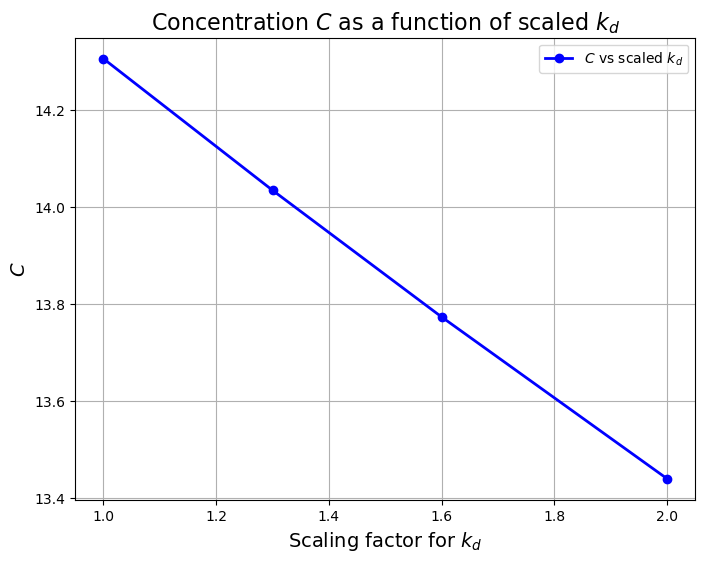

E0S0=40000.0
S0+bE0+kd=2796.0864819944595
kd=180.02
S0+bE0=2616.0664819944595
beta=12.080332409972298


In [203]:

import numpy as np
import matplotlib.pyplot as plt

r= 20.0; #(r) [18-5350]
delta=0.1; #(r) [0.03-0.9]
        
kcat=400; #(kcat) [36-7200000]
rd= 36.0; # De-phosphorylation of pVAV=VAV (rd)  [36-7200000]
        
kon=5.0; #Complex production (kon) [5-4500]
koff =500.0; # Complex dissociation (koff) [450-7200]


S0=r/delta
E0=r/delta

kd=(koff+kcat+delta)/kon

alpha=kcat/(rd+delta)

beta=alpha+1

x=(S0+(beta*E0)+kd)

#Exact
C=(x-np.sqrt((x*x)-(4*beta*E0*S0)))/(2*beta)
P=C*alpha



RHS=(r/delta)*(2+alpha)
f=4*beta*E0*S0
z=f/(x**2)

#cosidering 4th order correctiion
C1=(x/(2*beta))*((z/2))
C2= (x/(2*beta))*((z/2)+(z**2/8))
C3=(x/(2*beta))*((z/2)+(z**2/8)+(z**3/16))
C4 = (x/(2*beta))*((z/2)+(z**2/8)+(z**3/16)+(5*z**4/128))



print(f'kd ={kd}')
print(f'alpha ={alpha}')
print(f'RHS ={RHS}')
print('cosidering Exact--------')
print(f'C steady state ={C}')
print(f'P steady state ={P}')

print('cosidering first order correctiion--------')
print(f'C1 approximated steady state ={C1}')
print(f'P1 approximated steady state ={C1*alpha}')

print('cosidering 4th order correctiion---------------')
print(f'C4 approximated steady state ={C1,C2,C3,C4}')
print(f'P4 approximated steady state ={C4*alpha}')


print(f'a={E0*S0/(E0+beta*S0+kd)}')
print(f'C is ={x/(2*beta)*(1-(1-z)**0.5)}')
print(f'x is ={(4*beta*E0*S0)/(S0+beta*E0+kd)**2}')


# Modify kd values: 1, 1.3, 1.6, and 2 times the present kd
kd_multiples = [1, 1.3, 1.6, 2]
#kd_multiples = [1, 1, 1, 1]
kd_values = [kd * factor for factor in kd_multiples]
C_values = []

# Calculate C for each modified kd value
for kd_val in kd_values:
    x_val = (S0 + (beta * E0) + kd_val)
    C_val = E0*S0/x_val
    C_values.append(C_val)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(kd_multiples, C_values, 'bo-', label=r'$C$ vs scaled $k_d$', lw=2)
plt.xlabel(r'Scaling factor for $k_d$', fontsize=14)
plt.ylabel(r'$C$', fontsize=14)
plt.title(r'Concentration $C$ as a function of scaled $k_d$', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# # Values of S0 to vary
# S0_values = [r / delta, 2 * (r / delta), 3 * (r / delta), 4 * (r / delta)]  # 4 values of S0

# # Initialize a list to store C values for different S0
# C_values_S0 = []

# # Calculate C for each modified S0 value
# for S0_val in S0_values:
#     x_val = (S0_val + (beta * E0) + kd)
#     C_val = E0 * S0_val / x_val
#     C_values_S0.append(C_val)

# # Plot
# plt.figure(figsize=(8, 6))
# plt.plot(S0_values, C_values_S0, 'go-', label=r'$C$ vs scaled $S_0$', lw=2)
# plt.xlabel(r'Scaling factor for $S_0$', fontsize=14)
# plt.ylabel(r'$C$', fontsize=14)
# plt.title(r'Concentration $C$ as a function of scaled $S_0$', fontsize=16)
# plt.grid(True)
# plt.legend()
# plt.show()

print(f'E0S0={E0*S0}')
print(f'S0+bE0+kd={x}')
print(f'kd={kd}')
print(f'S0+bE0={S0+beta*E0}')
print(f'beta={beta}')

In [ ]:
E0=[20,30,40,50]
S0=[20,30,40,50]
beta=274
kd0=1300
kd=[kd0,1.3*kd0,1.6*kd0,2*kd0]




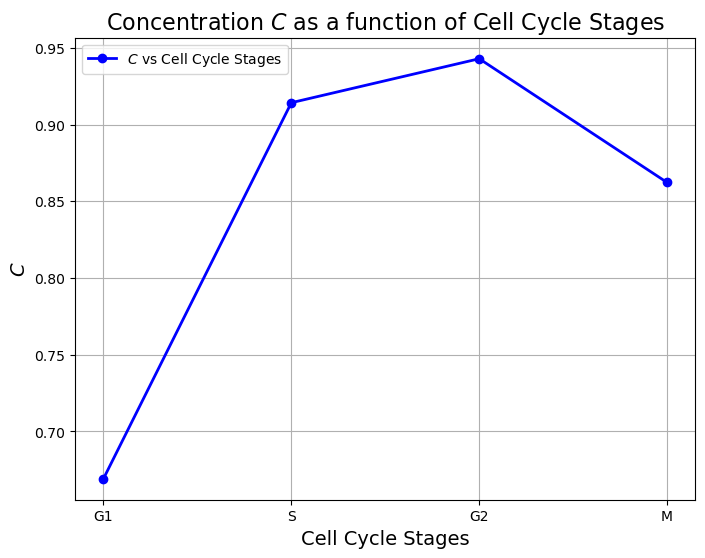

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b = 0.5  # Constant in the denominator
E_base = 10  # Initial value of enzyme concentration (E) at the first stage
S_base = 5   # Initial value of substrate concentration (S) at the first stage

# k_d scaling factors for each stage (1, 1.3, 1.6, 2.0)
kd_factors = [1, 1.3, 1.6, 2.0]
#kd_factors = [1, 1, 1, 1.0]
#kd_factors = [0, 0, 0, 0]

# Monotonically increasing E and S (let's assume they increase linearly for simplicity)

try1=[30 ,40 ,50, 60] #monotonic
try2=[30 ,30 ,30, 30] #monotonic decay
try3=[30 ,34 ,38, 40] #non mono peak
try4=[30 ,35 ,37, 39] #non mono peak
try5=[30 ,40 ,45, 48] #non mono peak


E_values = try5  # Linear increase in E over 4 stages
S_values =  E_values   # Linear increase in S over 4 stages

# Calculate C for each stage
C_values = []

for i in range(4):
    E = E_values[i]
    S = S_values[i]
    kd = kd_factors[i] * 1300  # Scale k_d by the factor for each stage (e.g., 1, 1.3, 1.6, 2.0)
    C = (E * S) / (S + b * E + kd)
    C_values.append(C)

# Plot C as a function of the cell cycle stages
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), C_values, 'bo-', label=r'$C$ vs Cell Cycle Stages', lw=2)
plt.xlabel('Cell Cycle Stages', fontsize=14)
plt.ylabel(r'$C$', fontsize=14)
plt.title('Concentration $C$ as a function of Cell Cycle Stages', fontsize=16)
plt.xticks([1, 2, 3, 4], ['G1', 'S', 'G2', 'M'])  # Label cell cycle stages
plt.grid(True)
plt.legend()
plt.show()


plot only (E*S/(S+bE+kd)) as a function of b

val=1056.25,8937.5, 1300
val=1296.0,9900.0, 1690.0
val=1444.0,10450.0, 2080.0
val=1600.0,11000.0, 2600


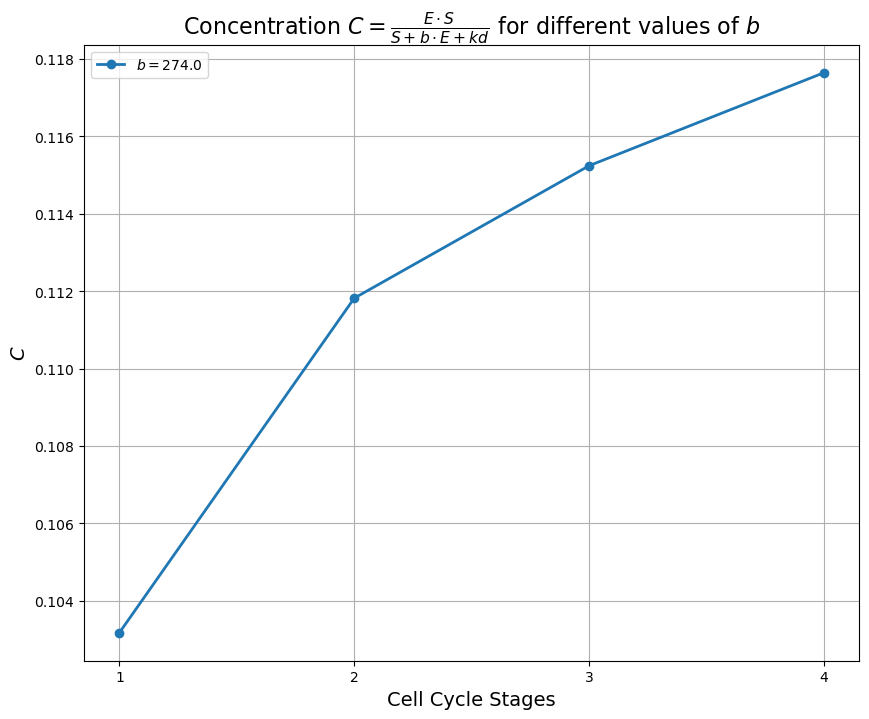

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the values for E and S at 4 stages
E_values =np.array([32.5, 36, 38, 40]) 
#E_values = np.array([20, 25, 27, 28])  # E values at stages 1, 2, 3, 4
#E_values = 15*np.array([20, 25, 27, 28])  # E values at stages 1, 2, 3, 4
#E_values = np.array([100, 105, 108, 109])  # E values at stages 1, 2, 3, 4
#E_values = np.array([100, 200, 250, 270])  # E values at stages 1, 2, 3, 4
S_values = E_values  # S values at stages 1, 2, 3, 4

# Define the stages (1, 2, 3, 4)
stages = [1, 2, 3, 4]

# Different values of b to test
b_values = [274]

# Define kd values for each stage (you can adjust as necessary)
kd0 =1300
kd = [kd0, kd0 * 1.3, kd0 * 1.6, kd0 * 2]

# Plotting
plt.figure(figsize=(10, 8))

# Loop over each value of b and calculate C
for b in b_values:
    C_values = [] 
    P_values = []  # List to store C values for each stage
    for i, stage in enumerate(stages):
        print(f'val={E_values[i] * S_values[i]},{S_values[i] + b * E_values[i]}, {kd[i]}')
        C = (E_values[i] * S_values[i]) / (S_values[i] + b * E_values[i] + kd[i])  # Use kd for each stage
        P=C*(b-1)
        C_values.append(C)
        P_values.append(P)
    # Plot the C values for the given b
    plt.plot(stages, C_values, marker='o', label=r'$b = {:.1f}$'.format(b), lw=2)

# Add labels, title, and legend
plt.xlabel('Cell Cycle Stages', fontsize=14)
plt.ylabel(r'$C$', fontsize=14)
plt.title(r'Concentration $C = \frac{E \cdot S}{S + b \cdot E+kd}$ for different values of $b$', fontsize=16)
plt.grid(True)
plt.xticks(stages)  # Ensure we show stages as x-axis labels (1, 2, 3, 4)
plt.legend()

# Display the plot
plt.show()


plt.plot(stages, P_values, marker='o', label=r'$b = {:.1f}$'.format(b), lw=2)
plt.show()